<a href="https://colab.research.google.com/github/XxMrShadowxX/An-lisis-de-Pokemones/blob/main/Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Vázquez Mendoza Oscar Alam
#Importar lo que se va a ocupar
import pandas as pd
#Requests para sacar datos de una base de datos
import requests
#Matplotlib paara realizar la grafica polar
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Nupy y math para realizar operaciones
import numpy as np
import math

In [3]:
#Se realiza la tabla con las columnas que llevara que son el nombre y las estadisticas del pokemon
pokemon = pd.DataFrame(columns=["Nombre", "Salud", "Ataque", "Defensa", "Ataque Especial", "Defensa Especial", "Velocidad"])
pokemon

,Nombre,Salud,Ataque,Defensa,Ataque Especial,Defensa Especial,Velocidad


In [4]:
#En este apartado se pide al usuario el numero del pokemon
n = input()
#Se ocupa requests para sacar informacion de la base da datos
api = requests.get(f"https://pokeapi.co/api/v2/pokemon/{n}")
data = api.json()
#Se realiza dos variantes donde velores tendra las estadisticas de los pokemones y el otro el nombre
valores = [data["stats"][0]["base_stat"], data["stats"][1]["base_stat"], data["stats"][2]["base_stat"], data["stats"][3]["base_stat"], data["stats"][4]["base_stat"], data["stats"][5]["base_stat"]]
nombre = data["name"]
#Es esta variante tendra las estadisticas junto con el nombre del pokemon, que va directo hacia la tabla
pokemon.loc[n] = [data["name"], data["stats"][0]["base_stat"], data["stats"][1]["base_stat"], data["stats"][2]["base_stat"], data["stats"][3]["base_stat"], data["stats"][4]["base_stat"], data["stats"][5]["base_stat"]]


1


In [5]:
#Se realiza lo mismo que la anterios celda, con la unica diferencia que se ejecutara la tabla
w = input()
api = requests.get(f"https://pokeapi.co/api/v2/pokemon/{w}")
data = api.json()
valores1 = [data["stats"][0]["base_stat"], data["stats"][1]["base_stat"], data["stats"][2]["base_stat"], data["stats"][3]["base_stat"], data["stats"][4]["base_stat"], data["stats"][5]["base_stat"]]
nombre1 = data["name"]
pokemon.loc[w] = [data["name"], data["stats"][0]["base_stat"], data["stats"][1]["base_stat"], data["stats"][2]["base_stat"], data["stats"][3]["base_stat"], data["stats"][4]["base_stat"], data["stats"][5]["base_stat"]]
pokemon
#La tabla guardara los pokemons que fueron buscados junto con sus estadistiscas

2


,Nombre,Salud,Ataque,Defensa,Ataque Especial,Defensa Especial,Velocidad
1,bulbasaur,45,49,49,65,65,45
2,ivysaur,60,62,63,80,80,60


In [6]:
#Es esta celda, se muestra como las dos variantes valores contiende sus estadisticas correctamente
print(valores1)
print(valores)
#Se crea una variante que se usara para la grafica llamada stats
stats = ["Salud", "Ataque", "Defensa", "Ataque Especial", "Defensa Especial", "Velocidad"]
z = len(stats)
print(z)
#La variante stats son 6, por lo cual se tranformara en angulos con la siguiente variante, usando numpy
angulos = [i/z * 2 * np.pi for i in range(z)]
print(np.degrees(angulos))

[60, 62, 63, 80, 80, 60]
[45, 49, 49, 65, 65, 45]
6
[  0.  60. 120. 180. 240. 300.]


In [8]:
#Para hacer que la grafica pueda verse como un poligono, se debe que cerrar, dar una vuelta por asi decirlo
#Por lo cual en esta celda hara que los valores y el angulo se repitan
valores += valores[:1]
valores1 += valores1[:1]
angulos += angulos[:1]
print(valores)
print(valores1)
print(np.degrees(angulos))

[45, 49, 49, 65, 65, 45, 45, 45]
[60, 62, 63, 80, 80, 60, 60, 60]
[  0.  60. 120. 180. 240. 300.   0.   0.]


Text(0.5, 1.05, 'Comparacion de estadisticas de pokemones')

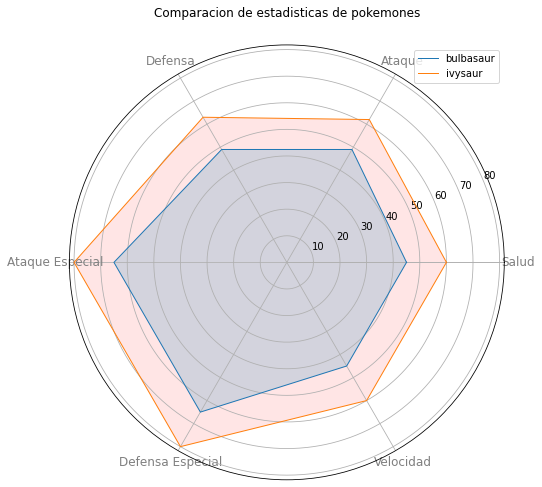

In [9]:
#En la primera linea se indica de tamaño, que grafica se va a utilizar
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(polar=True))
#En esta segunda linea, los grados se convierten en el nombre de las estaditicas correspondidas
plt.xticks(angulos[:-1], stats, color="grey", size=12)
#En la tecera linea, se usa matplotlib, para realizar la ecuacion 
ax.plot(angulos, valores, linewidth=1, linestyle="solid")
#En la cuarta linea, se da color a solo los valores
ax.fill(angulos, valores, "skyblue", alpha=0.4)
#La ecuacion para la variante valores1
ax.plot(angulos, valores1, linewidth=1, linestyle="solid")
#El color para la valores1
ax.fill(angulos, valores1, "red", alpha=0.1)
#La leyenda que tendra la grafica que son los nombres del pokemon 
plt.legend(labels=(nombre, nombre1), loc=1)
#Titulo de la grafica
plt.title("Comparacion de estadisticas de pokemones")